## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
import json
from pandas.io.json import json_normalize
from collections import OrderedDict
from IPython.display import display
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
raw_json = json.loads(open("logins.json").read())
normed_json = json_normalize(raw_json,'login_time')
normed_json.tail()

,0
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


Right away we can see here that this data is on the UNIX epoch, since it's safe to say that no one was loging into an app in 1970. This frequently happens when a date is saved in excel or the like, coverted to text from the epoch and then exported. To reverse we'll do this we'll add the number of days between 1/1/1970 and 1/1/2019 to each value.

In [4]:
normed_json[0].head()

0    1970-01-01 20:13:18
1    1970-01-01 20:16:10
2    1970-01-01 20:16:37
3    1970-01-01 20:16:36
4    1970-01-01 20:26:21
Name: 0, dtype: object

In [5]:
from time import time
from datetime import timedelta

normed_json['corrected_date'] = pd.to_datetime(normed_json[0]) + timedelta(days=17897)
normed_json.head()

,0,corrected_date
0,1970-01-01 20:13:18,2019-01-01 20:13:18
1,1970-01-01 20:16:10,2019-01-01 20:16:10
2,1970-01-01 20:16:37,2019-01-01 20:16:37
3,1970-01-01 20:16:36,2019-01-01 20:16:36
4,1970-01-01 20:26:21,2019-01-01 20:26:21


In [14]:
normed_json.set_index("corrected_date", inplace = True)
normed_json['count']=1
normed_json_min = normed_json.resample('15Min').sum()
normed_json_min.head()

,count
corrected_date,
2019-01-01 20:00:00,2
2019-01-01 20:15:00,6
2019-01-01 20:30:00,9
2019-01-01 20:45:00,7
2019-01-01 21:00:00,1


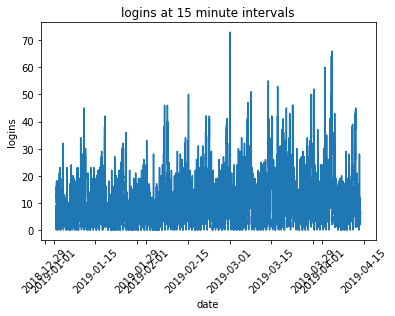

In [17]:
# histogram

plt.plot(normed_json_min.index, normed_json_min['count'])
plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('logins')
plt.title('logins at 15 minute intervals');

In [32]:
normed_json_day = normed_json.resample('24h').sum()
normed_json_day

,count
corrected_date,
2019-01-01,112
2019-01-02,681
2019-01-03,793
2019-01-04,788
2019-01-05,459
...,...
2019-04-09,818
2019-04-10,1009
2019-04-11,1352


In [9]:
series.resample('3T').sum()

NameError: name 'series' is not defined

In [10]:
vals.plot()
plt.show()

NameError: name 'vals' is not defined

In [8]:
pd.Series(normed_json['corrected_date']).resample('15Min').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [9]:
normed_json['corrected_date'].resample('15Min').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [10]:
.resample('3T').sum()

SyntaxError: invalid syntax (<ipython-input-10-e63623e21dde>, line 1)